Q.1 

Given two matrix with dimension (n,k) and (k,m).

the resulting matrix will be of dimension (n,m)

now, each entry of resulted matrix is a result of dot product of row of first matrix and column of the second matrix. so total multiplication for this would be equal to k. we have n x m such entry so, total multiplication will be n*m*k. 

similarly each dot product will need (k-1) addition. and we have n x m such entries. so total no of addition require will be n*m*(p-1)

Q.2

In [1]:
def matrix_multiply(A,B):
    m,n = len(A), len(B[0])
    k = len(B)
    mat = [[0 for _ in range(n)] for _ in range(m)]

    for i in range(m):
        for j in range(n):
            for t in range(k):
                mat[i][j] += A[i][t]*B[t][j]

    return mat

In [2]:
#try this out

A = [[1,2,3],[2,3,4]]  # (2,3) matrix
B = [[1,2],[3,4],[1,5]]

mat = matrix_multiply(A,B)
print(mat)

[[10, 25], [15, 36]]


In [3]:
#using numpy 

import numpy as np

def matmul(A, B):
    return np.matmul(A, B)

mat = matmul(A,B)

In [4]:
print(mat)

[[10 25]
 [15 36]]


In [5]:
#both have same answers

cheking for time 

In [76]:
import time

start_time  = time.time()
matrix_multiply(A,B)
end_time = time.time()

time_taken_1 = end_time - start_time

print(f"time taken by matrix_multiplication by bruteforce = {time_taken_1}")

start_time_ = time.time()
matmul(A,B)
end_time_ = time.time()

time_taken_2 = end_time_ - start_time_ 
print(f"time taken by numpy function = {time_taken_2}")

time taken by matrix_multiplication by bruteforce = 9.489059448242188e-05
time taken by numpy function = 0.000423431396484375


Q.3


In [69]:
# finding median by finding max element, then second max element will require a pass to array untill minmum element. which cause O(n^2) complexity. 
arr = [3,1,5,4,2]
import random

def median_(array):
    #O(n^2) approach
  median = 0
  for i in range(len(array)):
    count = 0
    for j in range(len(array)):
      if array[j] <= array[i]:
        count += 1
    if count == len(array) // 2+1:
      median = array[i]
      break
  return median
            
print(median_(arr))


def median_sort(arr):
    # O(n log n) method
    arr.sort()
    if len(arr)%2==0:
        return (arr[len(arr)//2] + arr[len(arr)//2+1])/2
    else:
        return arr[len(arr)//2]

print(median_sort(arr))

3
3


In [71]:
def median_by_numpy(arr):
    return np.median(arr)

In [72]:
median_by_numpy(arr)

3.0

In [77]:
start_time  = time.time()
median_(arr)
end_time = time.time()

time_taken_1 = end_time - start_time

print(f"time taken by function median_ = {time_taken_1}")

start_time_ = time.time()
median_by_numpy(arr)
end_time_ = time.time()

time_taken_2 = end_time_ - start_time_ 
print(f"time taken by numpy function = {time_taken_2}")

time taken by function median_ = 8.7738037109375e-05
time taken by numpy function = 0.00043487548828125


Q.4

The gradient of the function f(x, y) = x^2y + y^3sin(x) with respect to x and y is a vector of the form [df/dx, df/dy], where df/dx is the partial derivative of f with respect to x and df/dy is the partial derivative of f with respect to y.

To find the gradient of the given function f(x, y), you can use the following formulas:

df/dx = 2xy + y^3cos(x)
df/dy = x^2 + 3y^2sin(x)

So, the gradient of the function f(x, y) = x^2y + y^3sin(x) is [2xy + y^3cos(x), x^2 + 3y^2sin(x)].






Comparing with JAX
Q .5


---



In [8]:
!pip install jax jaxlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import jax.numpy as jnp
from jax import grad, random
import math

def f(x, y):
    return x**2*y + y**3*jnp.sin(x)

# Get a few random values of x and y
key = random.PRNGKey(0)
x, y = random.uniform(key, (2,))

# Evaluate the gradient of f at x and y
g = grad(f)(x, y)


for i in range(5):
    key = random.PRNGKey(0)
    x, y = random.uniform(key, (2,))
    g = grad(f)(x, y)
    print(i+1)
    print()
    print(f"Numerical approximation: {g}")
    print(f"Analytical solution: [2*{x}*{y} + {y}**3*cos({x}), {x}**2 + 3*{y}**2*sin({x})] = {2*x*y + y**3*math.cos(x), x**2 + 3*y**2*math.sin(x)}")
    print()


1

Numerical approximation: 0.8557004332542419
Analytical solution: [2*0.21629536151885986*0.804124116897583 + 0.804124116897583**3*cos(0.21629536151885986), 0.21629536151885986**2 + 3*0.804124116897583**2*sin(0.21629536151885986)] = (DeviceArray(0.85570043, dtype=float32), DeviceArray(0.46309963, dtype=float32))

2

Numerical approximation: 0.8557004332542419
Analytical solution: [2*0.21629536151885986*0.804124116897583 + 0.804124116897583**3*cos(0.21629536151885986), 0.21629536151885986**2 + 3*0.804124116897583**2*sin(0.21629536151885986)] = (DeviceArray(0.85570043, dtype=float32), DeviceArray(0.46309963, dtype=float32))

3

Numerical approximation: 0.8557004332542419
Analytical solution: [2*0.21629536151885986*0.804124116897583 + 0.804124116897583**3*cos(0.21629536151885986), 0.21629536151885986**2 + 3*0.804124116897583**2*sin(0.21629536151885986)] = (DeviceArray(0.85570043, dtype=float32), DeviceArray(0.46309963, dtype=float32))

4

Numerical approximation: 0.8557004332542419
Analy

In [10]:
import sympy as sym

# Define the variables x and y as symbols
x, y = sym.symbols('x, y')

# Define the function f
f = x**2*y + y**3*sym.sin(x)

# Differentiate f with respect to x and y
df_dx = sym.diff(f, x)
df_dy = sym.diff(f, y)

# Print the gradient of f
print(f"Gradient of f(x, y) = x^2*y + y^3*sin(x): [{df_dx}, {df_dy}]")


Gradient of f(x, y) = x^2*y + y^3*sin(x): [2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]


Hence same gradient

Q 7



In [11]:
di = {2022:
 {'branch 1' :{'roll no' : 1,'Name':'N','Marks':{'Maths':100,'English':70}},
 'branch 2':" "},
 2023:" "}

In [12]:
di

{2022: {'branch 1': {'roll no': 1,
   'Name': 'N',
   'Marks': {'Maths': 100, 'English': 70}},
  'branch 2': ' '},
 2023: ' '}

In [62]:
class Student:
  def __init__(self, name, roll_number, marks):
    self.name = name
    self.roll_number = roll_number
    self.marks = marks

class Branch:
  def __init__(self, name, students):
    self.name = name
    self.students = students

class Year:
  def __init__(self, year, branches):
    self.year = year
    self.branches = branches

# Create a student
student1 = Student("Yash", 1, [90, 80, 70, 60])
student2 = Student("Nikunj", 2, [70, 60, 90, 80])

# Create a branch
branch1 = Branch("Computer Science", [student1, student2])
branch2 = Branch("Chemical Engineering", [student2, student1])

# Create a year
year1 = Year(2020, [branch1, branch2])
year2 = Year(2021, [branch2, branch1])

# Create the overall database
database = [year1, year2]


Q.8

Q.9

<ipython-input-13-5637653ccd55>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,4,6)


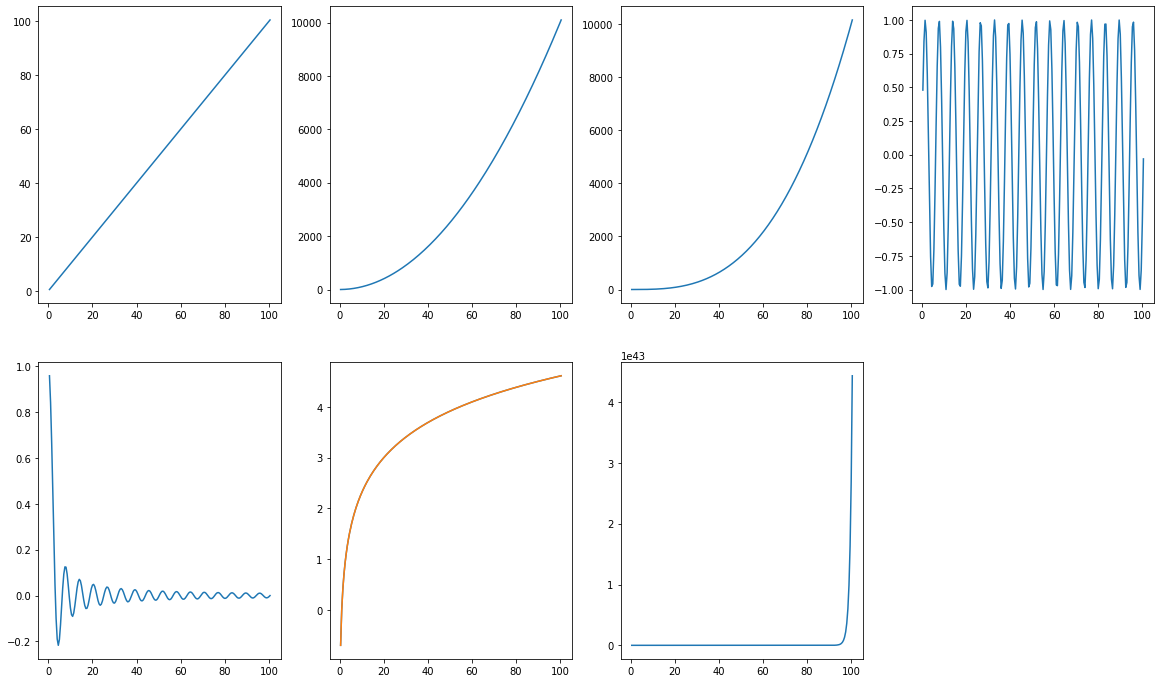

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,12))

# Create a domain of x values from 0.5 to 100.0 in steps of 0.5
x = [(i+1) * 0.5 for i in range(201)]

# Calculate the y values for each function
y1 = [x for x in x]
y2 = [x**2 for x in x]
y3 = [(x**3)/100 for x in x]
y4 = [math.sin(x) for x in x]
y5 = [(math.sin(x))/x for x in x]
y6 = [math.log(x) for x in x]
y7 = [math.exp(x) for x in x]
# Create a figure and axes object
plt.subplot(2,4,1)
plt.plot(x,y1)
plt.subplot(2,4,2)
plt.plot(x,y2)
plt.subplot(2,4,3)
plt.plot(x,y3)
plt.subplot(2,4,4)
plt.plot(x,y4)
plt.subplot(2,4,5)
plt.plot(x,y5)
plt.subplot(2,4,6)
plt.plot(x,y6)
plt.subplot(2,4,6)
plt.plot(x,y6)
plt.subplot(2,4,7)
plt.plot(x,y7)

Q.10

In [14]:
# Generate a matrix of size 20x5 containing random numbers drawn uniformly from the range of 1 to 2
matrix = np.random.uniform(1, 2, size=(20, 5))
print(matrix)

[[1.60114168 1.50624694 1.35538741 1.86315441 1.24392746]
 [1.19939354 1.48283451 1.68507179 1.14196339 1.68015349]
 [1.24051098 1.47801375 1.11239464 1.59949897 1.32223838]
 [1.82433812 1.59543731 1.5300345  1.34386631 1.60695467]
 [1.58733193 1.55304109 1.5685272  1.29730083 1.7506138 ]
 [1.06976053 1.35321895 1.87413308 1.53339684 1.9927577 ]
 [1.65709294 1.54170702 1.81778373 1.41434138 1.61559378]
 [1.18130884 1.25678607 1.68459338 1.19944244 1.76890277]
 [1.33159759 1.76703461 1.23119228 1.40733763 1.35246311]
 [1.28113617 1.86850249 1.87579536 1.08168114 1.34443286]
 [1.29296129 1.99288031 1.97867239 1.03714634 1.31721837]
 [1.61082048 1.32413827 1.80432863 1.15085619 1.48553462]
 [1.0317648  1.67224777 1.12875364 1.65145332 1.66339155]
 [1.37919378 1.07329038 1.37010321 1.26117429 1.8816987 ]
 [1.1020841  1.9947659  1.14230111 1.37126356 1.50402051]
 [1.68828367 1.99019132 1.02253124 1.17889806 1.64284917]
 [1.88541546 1.60293242 1.01979996 1.29720706 1.67817979]
 [1.79424479 1

In [43]:
import pandas as pd

# Create a dataframe from the matrix
df = pd.DataFrame(data=matrix, columns=['a', 'b', 'c', 'd', 'e'])
print(df)

           a         b         c         d         e
0   1.601142  1.506247  1.355387  1.863154  1.243927
1   1.199394  1.482835  1.685072  1.141963  1.680153
2   1.240511  1.478014  1.112395  1.599499  1.322238
3   1.824338  1.595437  1.530035  1.343866  1.606955
4   1.587332  1.553041  1.568527  1.297301  1.750614
5   1.069761  1.353219  1.874133  1.533397  1.992758
6   1.657093  1.541707  1.817784  1.414341  1.615594
7   1.181309  1.256786  1.684593  1.199442  1.768903
8   1.331598  1.767035  1.231192  1.407338  1.352463
9   1.281136  1.868502  1.875795  1.081681  1.344433
10  1.292961  1.992880  1.978672  1.037146  1.317218
11  1.610820  1.324138  1.804329  1.150856  1.485535
12  1.031765  1.672248  1.128754  1.651453  1.663392
13  1.379194  1.073290  1.370103  1.261174  1.881699
14  1.102084  1.994766  1.142301  1.371264  1.504021
15  1.688284  1.990191  1.022531  1.178898  1.642849
16  1.885415  1.602932  1.019800  1.297207  1.678180
17  1.794245  1.940900  1.717708  1.527132  1.

In [44]:
# Find the column with the highest standard deviation
col = df.std(axis=0)
print((col))

a    0.305767
b    0.290445
c    0.326882
d    0.209074
e    0.230331
dtype: float64


Q.11

Hence coulumn c has the highest standard deviation


In [45]:
df['f'] = df['a']+ df['b']+df['c'] + df['d'] + df['e']

In [46]:
df

,a,b,c,d,e,f
0,1.601142,1.506247,1.355387,1.863154,1.243927,7.569858
1,1.199394,1.482835,1.685072,1.141963,1.680153,7.189417
2,1.240511,1.478014,1.112395,1.599499,1.322238,6.752657
3,1.824338,1.595437,1.530035,1.343866,1.606955,7.900631
4,1.587332,1.553041,1.568527,1.297301,1.750614,7.756815
5,1.069761,1.353219,1.874133,1.533397,1.992758,7.823267
6,1.657093,1.541707,1.817784,1.414341,1.615594,8.046519
7,1.181309,1.256786,1.684593,1.199442,1.768903,7.091033
8,1.331598,1.767035,1.231192,1.407338,1.352463,7.089625
9,1.281136,1.868502,1.875795,1.081681,1.344433,7.451548


In [47]:
df = df.assign(g = lambda x: np.where(x['f'] < 8, 'LT8', 'GT8'))

In [48]:
df

,a,b,c,d,e,f,g
0,1.601142,1.506247,1.355387,1.863154,1.243927,7.569858,LT8
1,1.199394,1.482835,1.685072,1.141963,1.680153,7.189417,LT8
2,1.240511,1.478014,1.112395,1.599499,1.322238,6.752657,LT8
3,1.824338,1.595437,1.530035,1.343866,1.606955,7.900631,LT8
4,1.587332,1.553041,1.568527,1.297301,1.750614,7.756815,LT8
5,1.069761,1.353219,1.874133,1.533397,1.992758,7.823267,LT8
6,1.657093,1.541707,1.817784,1.414341,1.615594,8.046519,GT8
7,1.181309,1.256786,1.684593,1.199442,1.768903,7.091033,LT8
8,1.331598,1.767035,1.231192,1.407338,1.352463,7.089625,LT8
9,1.281136,1.868502,1.875795,1.081681,1.344433,7.451548,LT8


In [49]:
df['g'].value_counts()

LT8    16
GT8     4
Name: g, dtype: int64

In [53]:
std_LT8=df['f'][df['g']=='LT8'].std()
std_GT8=df['f'][df['g']=='GT8'].std()

In [54]:
print(std_LT8," ",std_GT8)

0.3296194609255811   0.08305542234406464


Q.12

Explaining Broadcasting in numpy 

In [55]:


# Create a 1-dimensional array with 5 elements
a = np.array([1, 2, 3, 4, 5])

# Create a 2-dimensional array with 3 rows and 5 columns
b = np.array([[1, 2, 3, 4, 5],
              [6, 7, 8, 9, 10],
              [11, 12, 13, 14, 15]])

# The shapes of 'a' and 'b' are incompatible, but broadcasting allows us to perform element-wise multiplication
c = a * b

print(c)


[[ 1  4  9 16 25]
 [ 6 14 24 36 50]
 [11 24 39 56 75]]


Q.13

In [57]:
def argmin(arr):
    min_element = min(arr)
    for i in range(len(arr)):
        if(arr[i]==min_element):
            return i

In [58]:
arr = [3,1,2,5,4]
print(argmin(arr))

1


In [61]:
#verifying the solution using np.argmin
print(np.argmin(arr))

1
